<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Contour Detection

## External vs Internal Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('game_screen.PNG',0)

In [3]:
img.shape

(757, 444)

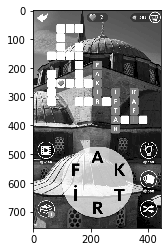

In [4]:
plt.imshow(img,cmap='gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [5]:
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
type(contours)

list

In [7]:
len(contours)

692

In [8]:
type(hierarchy)

numpy.ndarray

In [9]:
hierarchy.shape

(1, 692, 4)

In [10]:
hierarchy

array([[[  1,  -1,  -1,  -1],
        [  2,   0,  -1,  -1],
        [  3,   1,  -1,  -1],
        ...,
        [690, 688,  -1,  46],
        [691, 689,  -1,  46],
        [ -1, 690,  -1,  46]]], dtype=int32)

In [11]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

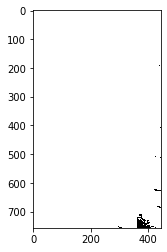

In [12]:
plt.imshow(external_contours,cmap='gray')

In [13]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

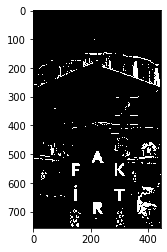

In [14]:
plt.imshow(image_internal,cmap='gray')

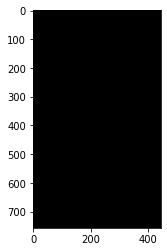

In [15]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] == 0:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        
plt.imshow(image_internal,cmap='gray')